# **MLP model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation
from src import tensorflow

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-09 19:38:36.157816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 19:38:36.668683: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-09 19:38:36.668732: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-09 19:38:36.668737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/MLP/2023-03-09_19-38-37


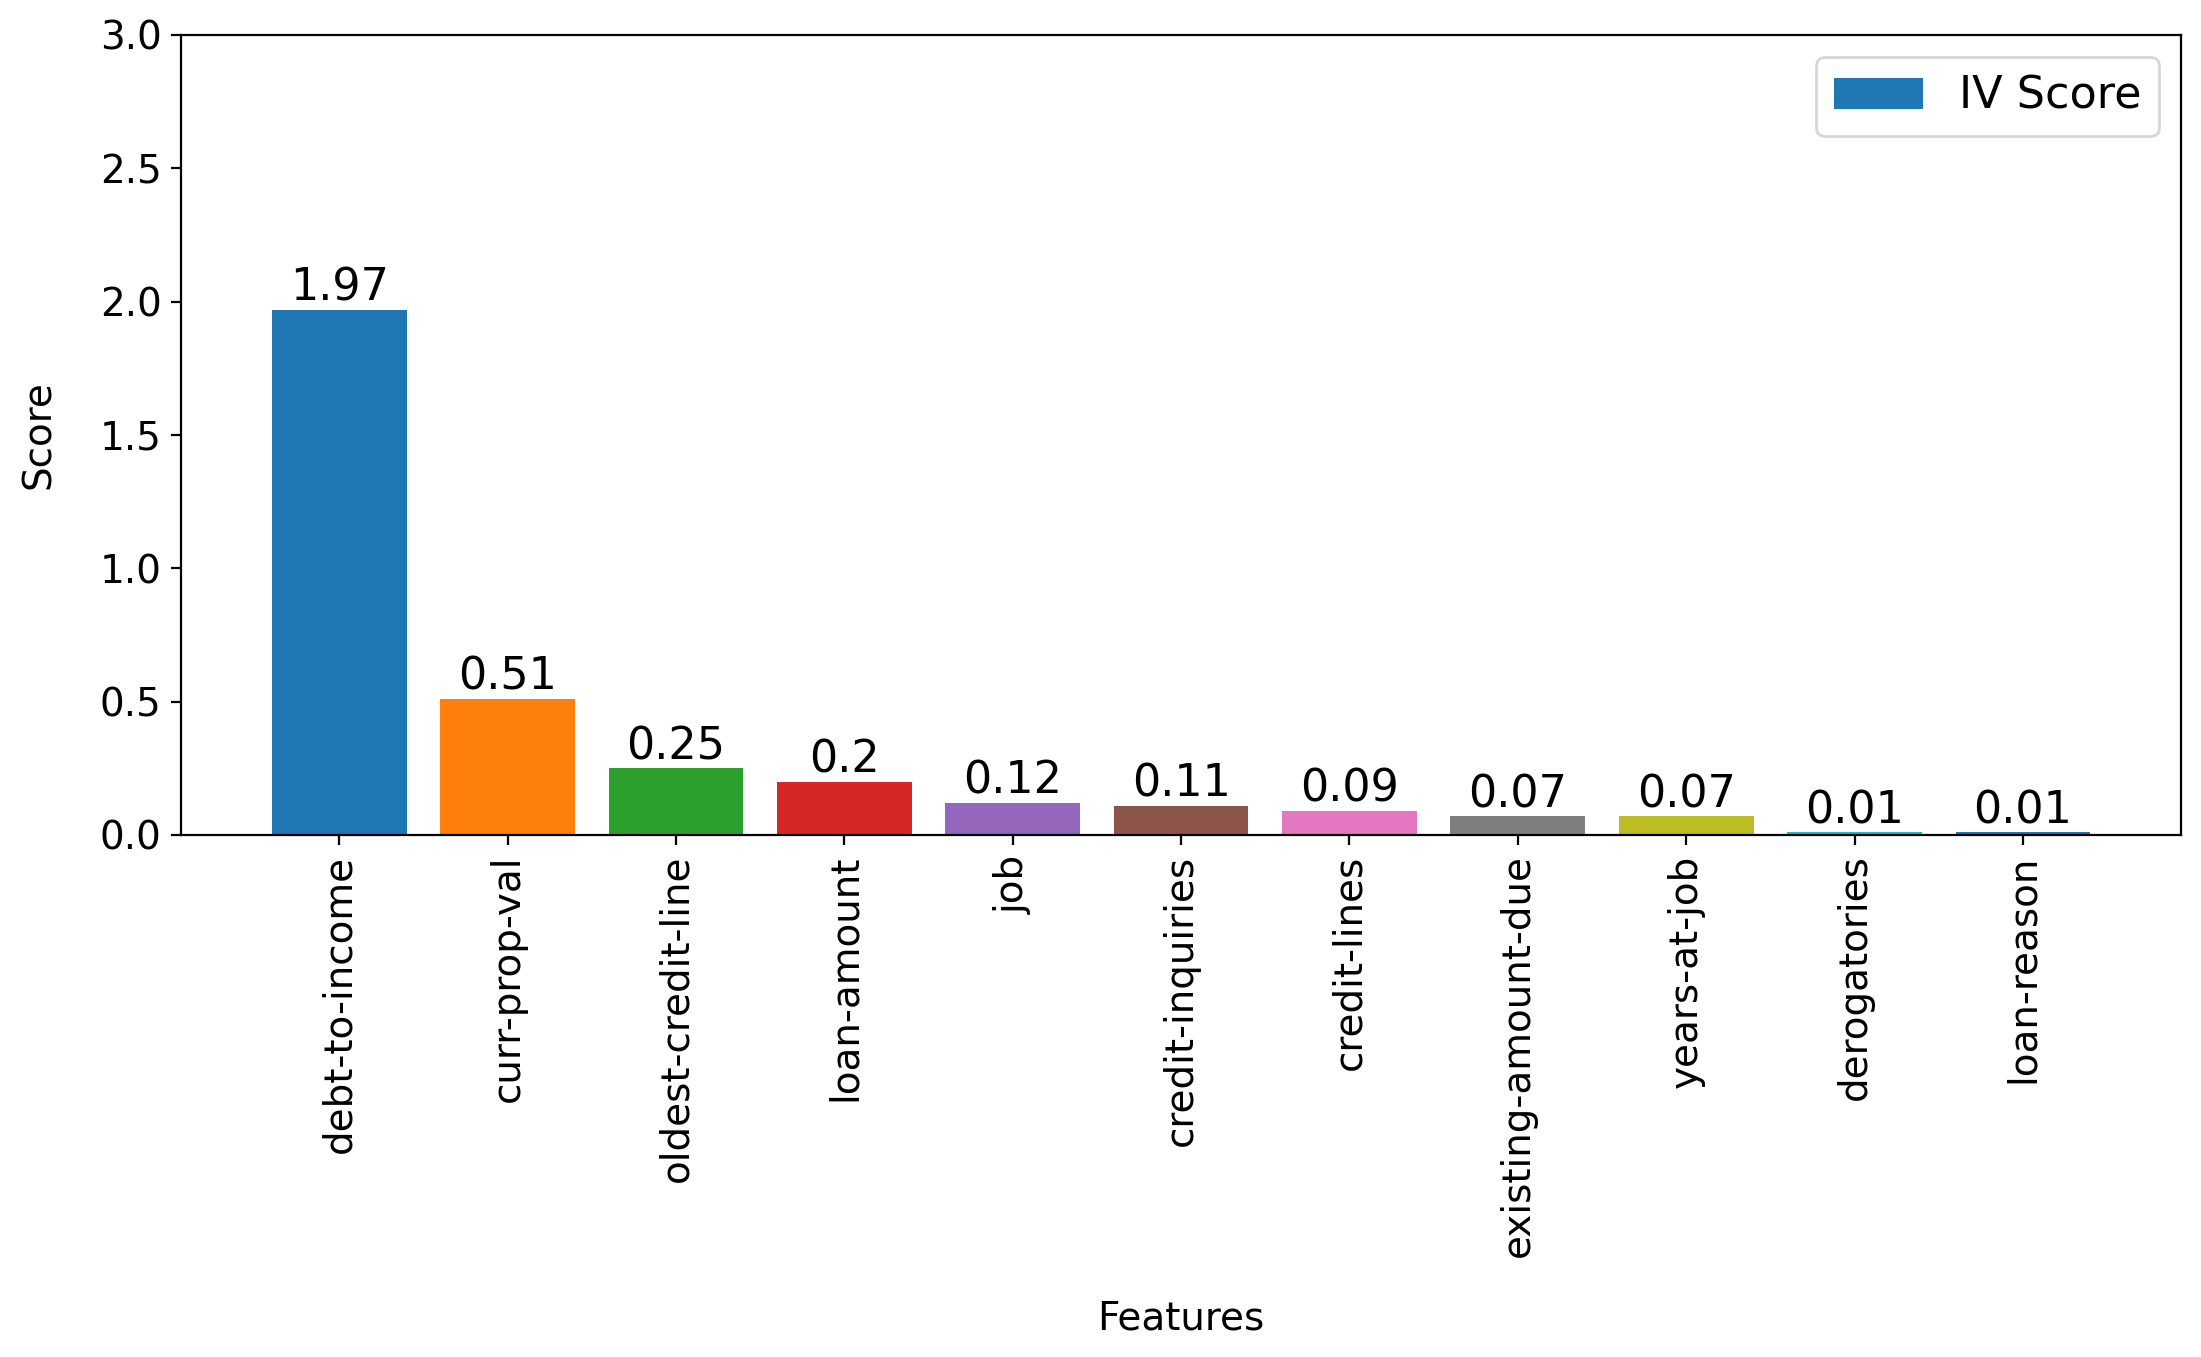

Selected Features: ['loan-amount', 'existing-amount-due', 'curr-prop-val', 'loan-reason', 'job', 'years-at-job', 'derogatories', 'oldest-credit-line', 'credit-inquiries', 'credit-lines', 'debt-to-income']


0it [00:00, ?it/s]

# **FOLD 1**

Model: "MLP-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

2023-03-09 19:38:37.458475: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-09 19:38:37.458494: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-09 19:38:37.458509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ns31557341): /proc/driver/nvidia/version does not exist
2023-03-09 19:38:37.458685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
73/75 [============================>.] - ETA: 0s - loss: 0.0572 - accuracy: 0.7821
Epoch 1: val_loss improved from inf to 0.04971, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


75/75 [==============================] - 3s 26ms/step - loss: 0.0568 - accuracy: 0.7840 - val_loss: 0.0497 - val_accuracy: 0.8280 - lr: 1.0000e-04
Epoch 2/10
74/75 [============================>.] - ETA: 0s - loss: 0.0472 - accuracy: 0.8497
Epoch 2: val_loss improved from 0.04971 to 0.04458, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


75/75 [==============================] - 2s 22ms/step - loss: 0.0472 - accuracy: 0.8490 - val_loss: 0.0446 - val_accuracy: 0.8406 - lr: 1.0000e-04
Epoch 3/10
72/75 [===========================>..] - ETA: 0s - loss: 0.0440 - accuracy: 0.8359
Epoch 3: val_loss improved from 0.04458 to 0.04339, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


75/75 [==============================] - 1s 20ms/step - loss: 0.0442 - accuracy: 0.8360 - val_loss: 0.0434 - val_accuracy: 0.8414 - lr: 1.0000e-04
Epoch 4/10
74/75 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.8332
Epoch 4: val_loss improved from 0.04339 to 0.04312, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


75/75 [==============================] - 2s 21ms/step - loss: 0.0431 - accuracy: 0.8335 - val_loss: 0.0431 - val_accuracy: 0.8339 - lr: 1.0000e-04
Epoch 5/10
71/75 [===========================>..] - ETA: 0s - loss: 0.0424 - accuracy: 0.8336
Epoch 5: val_loss improved from 0.04312 to 0.04282, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


75/75 [==============================] - 2s 21ms/step - loss: 0.0424 - accuracy: 0.8343 - val_loss: 0.0428 - val_accuracy: 0.8406 - lr: 1.0000e-04
Epoch 6/10
74/75 [============================>.] - ETA: 0s - loss: 0.0419 - accuracy: 0.8399
Epoch 6: val_loss improved from 0.04282 to 0.04279, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


75/75 [==============================] - 2s 22ms/step - loss: 0.0419 - accuracy: 0.8402 - val_loss: 0.0428 - val_accuracy: 0.8335 - lr: 1.0000e-04
Epoch 7/10
71/75 [===========================>..] - ETA: 0s - loss: 0.0414 - accuracy: 0.8433
Epoch 7: val_loss improved from 0.04279 to 0.04270, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-1/assets


75/75 [==============================] - 2s 22ms/step - loss: 0.0415 - accuracy: 0.8423 - val_loss: 0.0427 - val_accuracy: 0.8461 - lr: 1.0000e-04
Epoch 8/10
72/75 [===========================>..] - ETA: 0s - loss: 0.0412 - accuracy: 0.8472
Epoch 8: val_loss did not improve from 0.04270
75/75 [==============================] - 1s 15ms/step - loss: 0.0410 - accuracy: 0.8477 - val_loss: 0.0436 - val_accuracy: 0.8519 - lr: 1.0000e-04
Epoch 9/10
74/75 [============================>.] - ETA: 0s - loss: 0.0407 - accuracy: 0.8526
Epoch 9: val_loss did not improve from 0.04270
75/75 [==============================] - 1s 16ms/step - loss: 0.0406 - accuracy: 0.8528 - val_loss: 0.0431 - val_accuracy: 0.8310 - lr: 1.0000e-04
Epoch 10/10
71/75 [===========================>..] - ETA: 0s - loss: 0.0405 - accuracy: 0.8508
Epoch 10: val_loss did not improve from 0.04270
75/75 [==============================] - 1s 14ms/step - loss: 0.0402 - accuracy: 0.8544 - val_loss: 0.0432 - val_accuracy: 0.8536 - lr

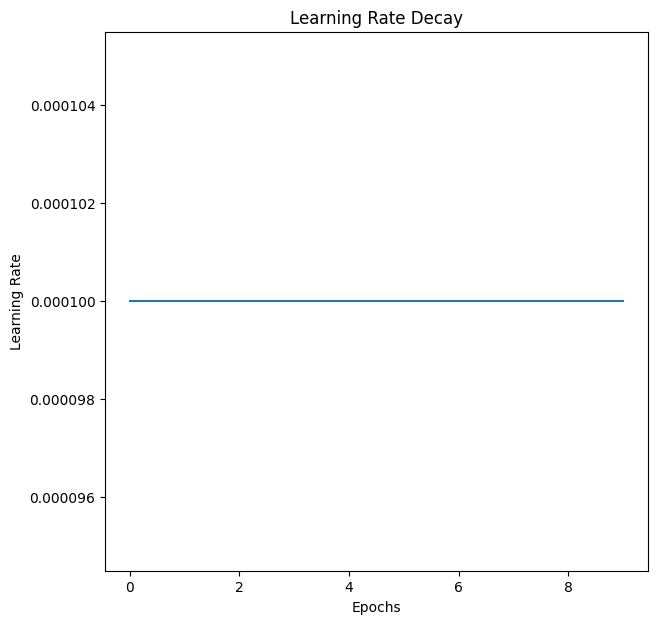

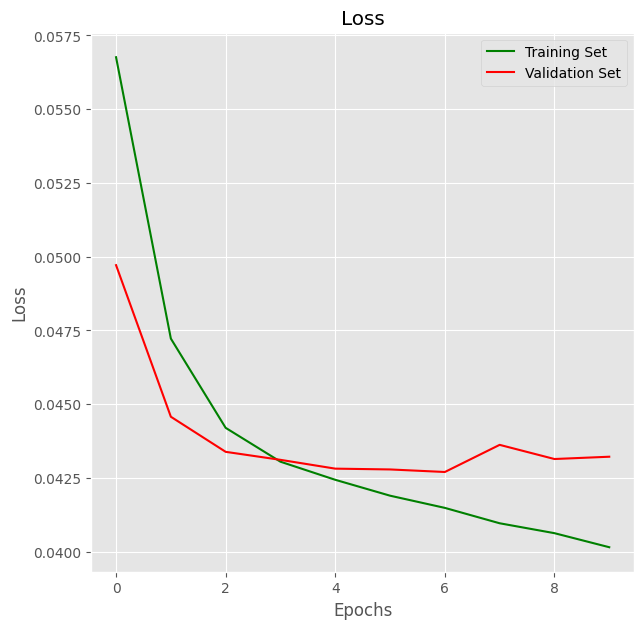

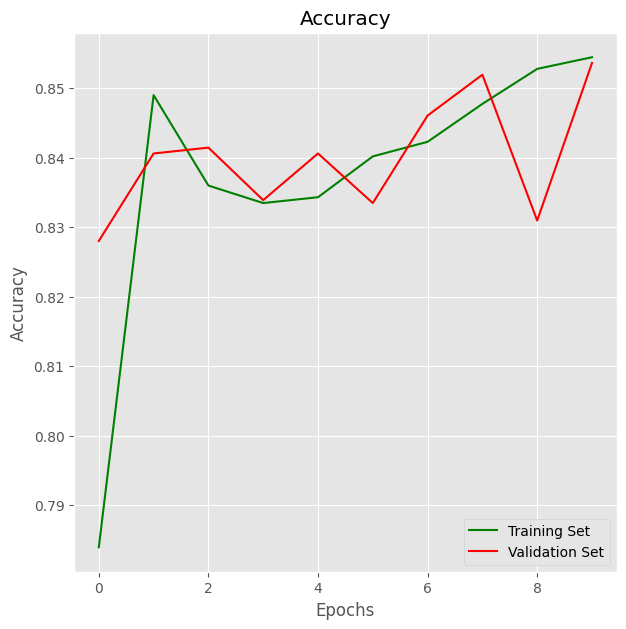

Average loss on train set: 0.04388127475976944
Average accuracy on train set: 0.8374161124229431
Average loss on test set: 0.04390893690288067
Average accuracy on test set: 0.8400587260723114
38/38 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.8431
Test Loss: 0.04268676042556763
Test Accuracy: 0.843120813369751


2023-03-09 19:38:53.677871: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-09_19-38-37/fold-1: FAILED_PRECONDITION: ../../../models/MLP/2023-03-09_19-38-37/fold-1; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 3ms/step


/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
1it [00:17, 17.67s/it]

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1908
           1       0.61      0.74      0.67       476

    accuracy                           0.86      2384
   macro avg       0.77      0.81      0.79      2384
weighted avg       0.87      0.86      0.86      2384

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1909
           1       0.59      0.73      0.66       475

    accuracy                           0.85      2384
   macro avg       0.76      0.80      0.78      2384
weighted avg       0.86      0.85      0.85      2384


-------- TERMINATED FOLD: 1 --------


# **FOLD 2**

Model: "MLP-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


75/75 [==============================] - 2s 25ms/step - loss: 0.0564 - accuracy: 0.7924 - val_loss: 0.0498 - val_accuracy: 0.8515 - lr: 1.0000e-04
Epoch 2/10
72/75 [===========================>..] - ETA: 0s - loss: 0.0459 - accuracy: 0.8507
Epoch 2: val_loss improved from 0.04984 to 0.04505, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


75/75 [==============================] - 2s 24ms/step - loss: 0.0462 - accuracy: 0.8507 - val_loss: 0.0450 - val_accuracy: 0.8310 - lr: 1.0000e-04
Epoch 3/10
74/75 [============================>.] - ETA: 0s - loss: 0.0433 - accuracy: 0.8374
Epoch 3: val_loss improved from 0.04505 to 0.04440, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0432 - accuracy: 0.8377 - val_loss: 0.0444 - val_accuracy: 0.8377 - lr: 1.0000e-04
Epoch 4/10
72/75 [===========================>..] - ETA: 0s - loss: 0.0421 - accuracy: 0.8433
Epoch 4: val_loss improved from 0.04440 to 0.04392, saving model to ../../../models/MLP/2023-03-09_19-38-37/fold-2


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


75/75 [==============================] - 2s 23ms/step - loss: 0.0423 - accuracy: 0.8431 - val_loss: 0.0439 - val_accuracy: 0.8293 - lr: 1.0000e-04
Epoch 5/10
75/75 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.8452
Epoch 5: val_loss did not improve from 0.04392
75/75 [==============================] - 1s 15ms/step - loss: 0.0418 - accuracy: 0.8452 - val_loss: 0.0440 - val_accuracy: 0.8251 - lr: 1.0000e-04
Epoch 6/10
73/75 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.8506
Epoch 6: val_loss did not improve from 0.04392
75/75 [==============================] - 1s 14ms/step - loss: 0.0413 - accuracy: 0.8523 - val_loss: 0.0439 - val_accuracy: 0.8406 - lr: 1.0000e-04
Epoch 7/10
75/75 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.8519
Epoch 7: val_loss did not improve from 0.04392
75/75 [==============================] - 1s 15ms/step - loss: 0.0408 - accuracy: 0.8519 - val_loss: 0.0448 - val_accuracy: 0.8180 - lr: 

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-09_19-38-37/fold-2/assets


75/75 [==============================] - 2s 26ms/step - loss: 0.0406 - accuracy: 0.8494 - val_loss: 0.0432 - val_accuracy: 0.8360 - lr: 1.0000e-04
Epoch 9/10
73/75 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.8527
Epoch 9: val_loss did not improve from 0.04324
75/75 [==============================] - 1s 14ms/step - loss: 0.0401 - accuracy: 0.8523 - val_loss: 0.0438 - val_accuracy: 0.8431 - lr: 1.0000e-04
Epoch 10/10
75/75 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.8540
Epoch 10: val_loss did not improve from 0.04324
75/75 [==============================] - 1s 15ms/step - loss: 0.0396 - accuracy: 0.8540 - val_loss: 0.0451 - val_accuracy: 0.8544 - lr: 1.0000e-04


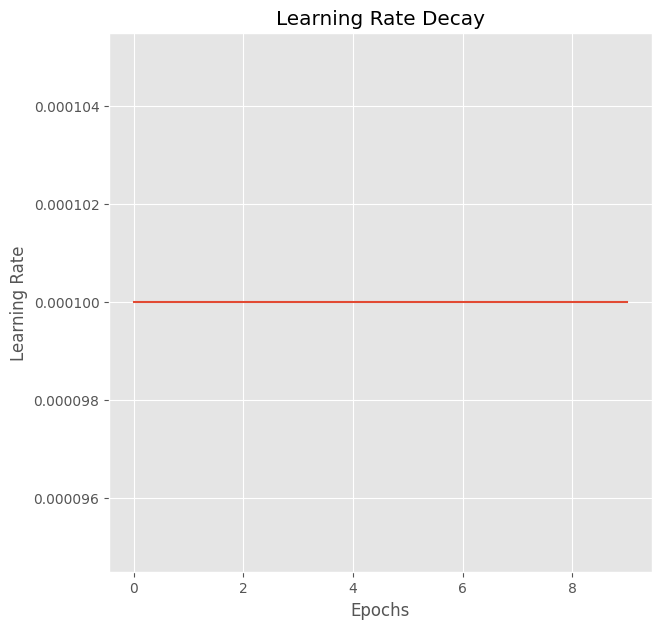

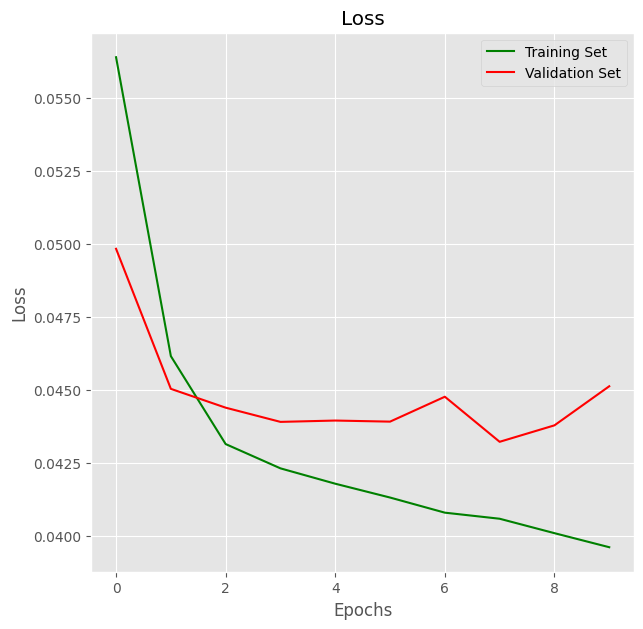

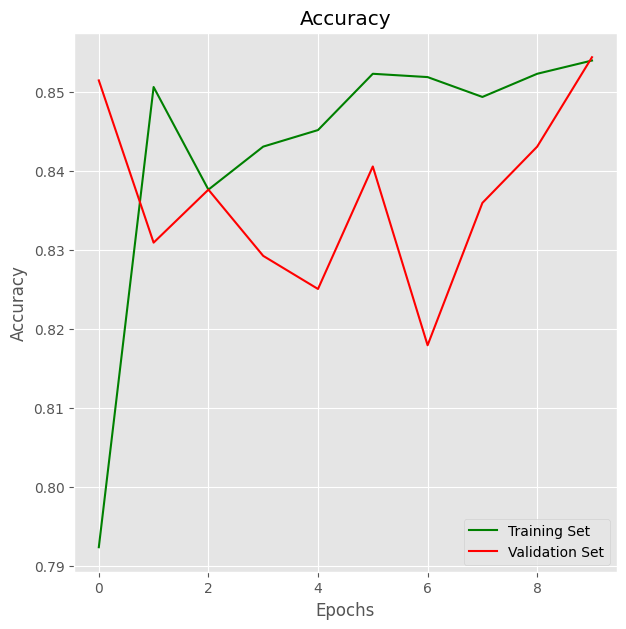

Average loss on train set: 0.04323247484862804
Average accuracy on train set: 0.8429110705852508
Average loss on test set: 0.04480450935661793
Average accuracy on test set: 0.8366610705852509
38/38 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.8456
Test Loss: 0.04136165603995323
Test Accuracy: 0.8456375598907471


2023-03-09 19:39:10.964799: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-09_19-38-37/fold-2: FAILED_PRECONDITION: ../../../models/MLP/2023-03-09_19-38-37/fold-2; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


38/38 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1909
           1       0.61      0.76      0.67       475

    accuracy                           0.85      2384
   macro avg       0.77      0.82      0.79      2384
weighted avg       0.87      0.85      0.86      2384



/home/debian/.local/lib/python3.9/site-packages/EMP/metrics.py:154: RuntimeWarning: divide by zero encountered in divide
  lambda_values = np.append(0, (((roc[3]*ROI) / roc[2])*(np.diff(roc[5]) / np.diff(roc[4]))))
2it [00:34, 17.46s/it]

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1908
           1       0.57      0.71      0.63       476

    accuracy                           0.84      2384
   macro avg       0.75      0.79      0.76      2384
weighted avg       0.85      0.84      0.84      2384


-------- TERMINATED FOLD: 2 --------


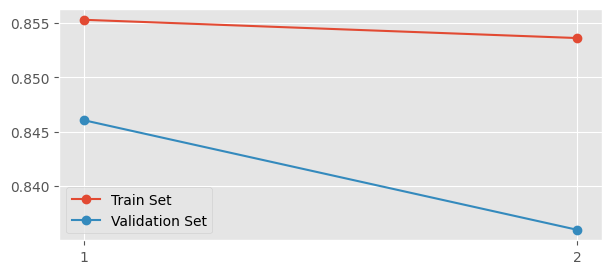

Average Train Set Accuracy: 0.8544463087248322
Average Validation Set Accuracy: 0.8410234899328859


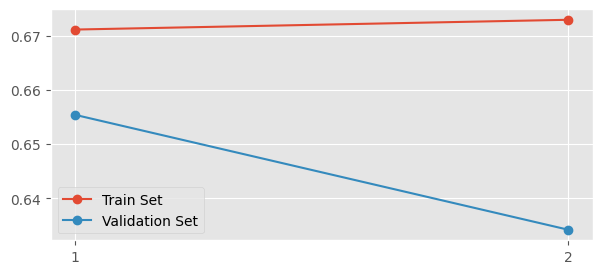

Average Train Set F1 Score: 0.6720150310511284
Average Validation Set F1 Score: 0.6448183331357021


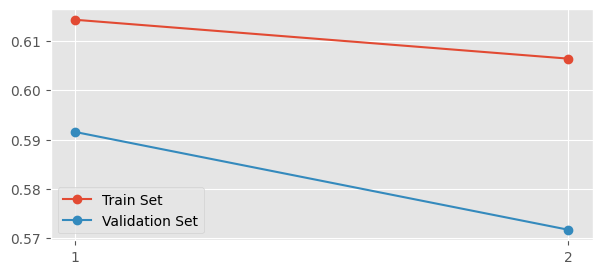

Average Train Set Precision: 0.6103647823215886
Average Validation Set Precision: 0.5815974504816075


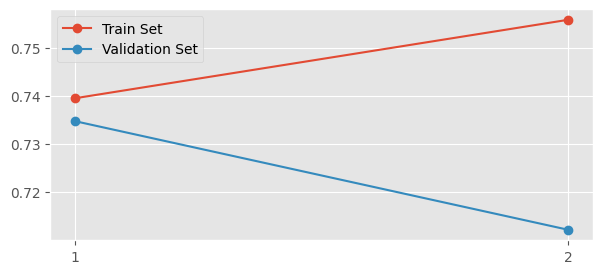

Average Train Set Recall: 0.7476426360017692
Average Validation Set Recall: 0.7234608580274215


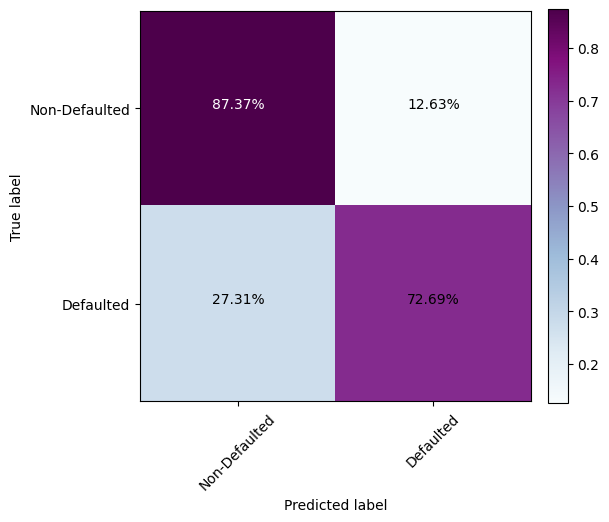

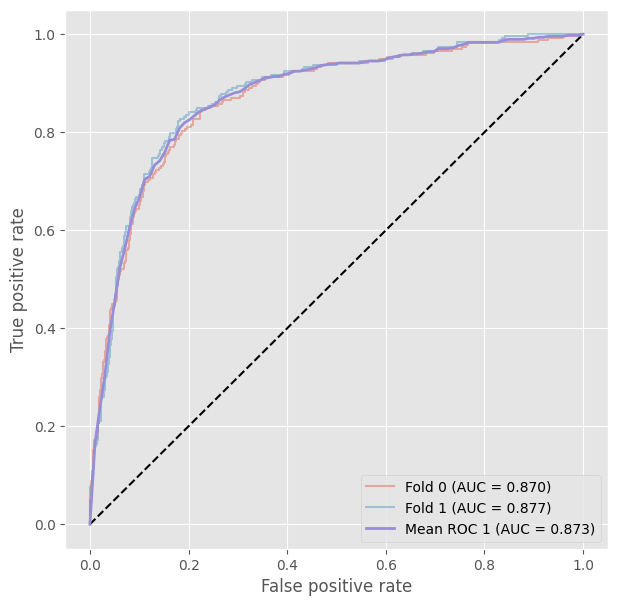

Gini derived from mean AUC 0.7462015109073934


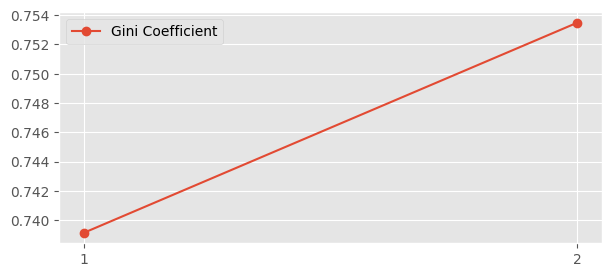

Average Gini Coefficient: 0.7463092155101033


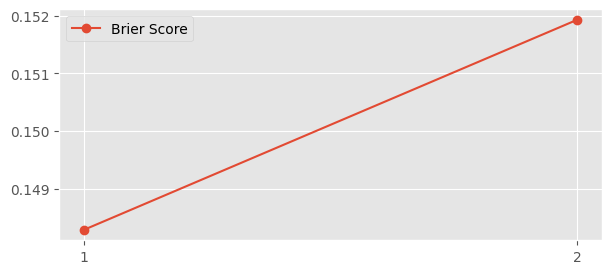

Average Brier Score: 0.1501108840708247


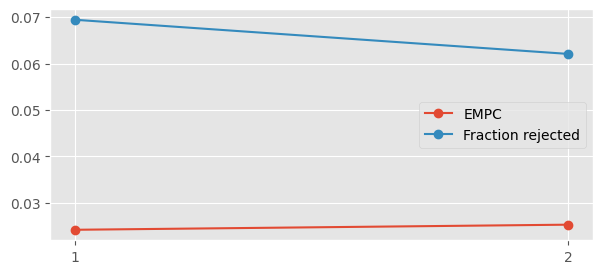

Average EMP: 0.02472057981622449
Average EMP Fractions: 0.06577364195306516


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

layers = [
    tensorflow.input_layer((11,), dtype='float64'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(1, activation='sigmoid')
]

evaluation.k_fold_cross_validate(clf=None, layers=layers, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=2, features_scores=features_scores,
                                 features=11, model_name='MLP', learning_rate=0.0001,
                                 epochs=10, batch_size=32, verbose=True)